In [1]:
# Import modules
import requests
from bs4 import BeautifulSoup

# Headers to simulate browser visit
HEADERS = ({
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) \
                   AppleWebKit/537.36 (KHTML, like Gecko) \
                   Chrome/90.0.4430.212 Safari/537.36',
    'Accept-Language': 'en-US, en;q=0.5'
})

# Scrape the data
def getdata(site_url):
    res = requests.get(site_url, headers=HEADERS)
    return res.text

def gethtml(site_url):
    data = getdata(site_url)
    soup = BeautifulSoup(data, 'html.parser')
    return soup

site_url = "https://www.amazon.in/Columbia-Mens-wind-resistant-Glove/dp/B0772WVHPS/"

soup = gethtml(site_url)

# Function to get Customer Names
def getCustomerNames(soup):
    customer_list = []
    for item in soup.find_all("span", class_="a-profile-name"):
        customer_list.append(item.get_text(strip=True))
    return customer_list

# Function to get Review Comments
def getReviewComments(soup):
    review_list = []
    for review in soup.find_all("span", {'data-hook': 'review-body'}):
        review_list.append(review.get_text(strip=True))
    return review_list

# Function to get Ratings
def getRatings(soup):
    rating_list = []
    for rating in soup.find_all("i", {'data-hook': 'review-star-rating'}):
        rating_list.append(rating.get_text(strip=True))
    return rating_list

# Function to get Comment Tags (like 'Verified Purchase')
def getCommentTags(soup):
    tag_list = []
    for tag in soup.find_all("span", {'data-hook': 'avp-badge'}):
        tag_list.append(tag.get_text(strip=True))
    return tag_list

# Call all functions
customer_names = getCustomerNames(soup)
review_comments = getReviewComments(soup)
ratings = getRatings(soup)
comment_tags = getCommentTags(soup)

# Print all collected data
print("Customer Names:", customer_names)
print("\nReview Comments:", review_comments)
print("\nRatings:", ratings)
print("\nComment Tags:", comment_tags)


Customer Names: ['Amazon Customer', 'Amazon Customer', 'Pavan H', 'Anu', 'Amaze', 'Amaze', 'jason', 'Charl', 'D. Kong', 'Robert', 'Alexey']

Review Comments: ['Columbia quality is the best in sports brandsRead more', 'I would not recommend this product for winters.Read more', 'Somewhat smallRead more', 'GoodRead more', 'These are great quality.  They do run a little on the small sizes like other reviewers said.  Just go up one size from what you would normally order.Read more', "I normally wear size L and this size L fits very well. There is enough room on the palm and back of hands so that it doesn't restrict movement. It is comfortable when holding trekking poles or driving wheel without too much pressure on knuckle area. The fit on fingers are perfect for me, except that the thumbs are 1cm too long. My thumbs can only reach the end of gloves when I do a thumb up gesture. I don't think my activity involves the thumb up gesture at all. A walk outside at 4C temperature initially feels 

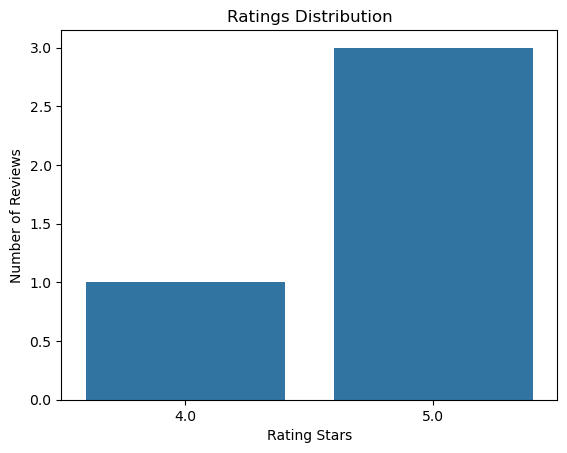

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Clean ratings (e.g., '5.0 out of 5 stars' -> 5)
numeric_ratings = [float(rating.split()[0]) for rating in ratings]

# Count ratings
rating_counts = Counter(numeric_ratings)

# Plot
sns.barplot(x=list(rating_counts.keys()), y=list(rating_counts.values()))
plt.title('Ratings Distribution')
plt.xlabel('Rating Stars')
plt.ylabel('Number of Reviews')
plt.show()


In [5]:
from wordcloud import WordCloud

# Combine all comments into one text
text = " ".join(review_comments)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Reviews')
plt.show()


ModuleNotFoundError: No module named 'wordcloud'

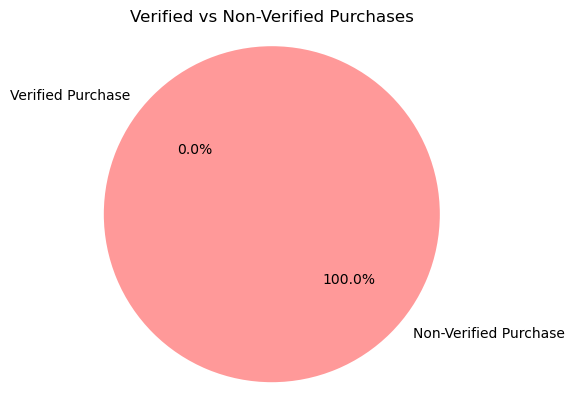

In [7]:
verified_count = comment_tags.count('Verified Purchase')
non_verified_count = len(customer_names) - verified_count

# Data for pie chart
labels = ['Verified Purchase', 'Non-Verified Purchase']
sizes = [verified_count, non_verified_count]

# Plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#ff9999'])
plt.title('Verified vs Non-Verified Purchases')
plt.axis('equal')
plt.show()
